# Personal Loan Modeling

## Predict whether a customer will respond to a Personal Loan Campaign!

https://www.kaggle.com/datasets/teertha/personal-loan-modeling

![image.png](../Images/Personal_Loan.png)

은행에서 수집한 고객 5,000명의 금융정보에 따른 대출여부가 들어있는 참조데이터를 이용하여 대출 여부를 분류하는 가장 최적의 이웃의 값을 구하고, 이때 분류 정확도를 산출하시오. (단, 참조데이터는 7:3의 비율로 트레이닝 데이터와 테스트 데이터로 구분하고, 트레이닝 데이터와 테스트 데이터의 대출여부(y)의 비율도 유지한다. 또한, Normalizer를 사용하여 스케일링을 진행한다.)

### Library & Data Import

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
ploan = pd.read_csv('../Datasets/Personal_loan.csv')

ploan.shape

(5000, 14)

In [3]:
ploan.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
# 의미없는 변수 제거 + NaN 관측치 제거
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis=1, inplace=False)

ploan_processed

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [5]:
# ploan_processed의 독립변수와 종속변수를 나눠 저장한다.
X = ploan_processed.drop(['Personal Loan'], axis=1)
y = ploan_processed['Personal Loan']                 # 대출여부 : 1 or 0

In [6]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [7]:
y.to_frame()

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [8]:
from sklearn.model_selection import train_test_split

# personal loan으로 학습 데이터와 테스트 데이터로 나누기(7:3)
# 종속변수인 Personal Loan(대출여부)의 범주간 비율 차이가 크기 때문에 train_test_split() 함수의 stratify(계층샘플)에 y를 입력

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=1234)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 11) (1500, 11) (3500,) (1500,)


In [9]:
import sklearn.preprocessing as preprocessing

preprocessor = preprocessing.Normalizer()

In [10]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [11]:
training_accuracy = []
test_accuracy = []

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# 1에서 25까지 n_neighbors를 적용
neighbors_settings = range(1, 25)

# KNeighborsClassifier() 함수에 K개수를 입력하여 모델을 만들고 트레이닝 데이터와 테스트 데이터를 적용
for n_neighbor in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbor)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

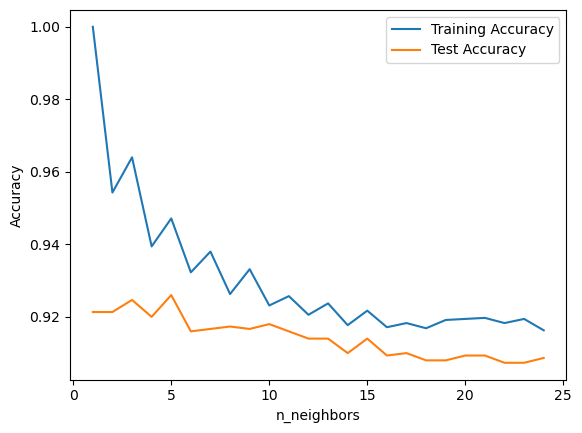

In [13]:
# K의 변화량에 따른 예측정확도 성능 비교

from sklearn import metrics
from sklearn.metrics import accuracy_score

plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')

plt.legend()

In [14]:
test_accuracy

[0.9213333333333333,
 0.9213333333333333,
 0.9246666666666666,
 0.92,
 0.926,
 0.916,
 0.9166666666666666,
 0.9173333333333333,
 0.9166666666666666,
 0.918,
 0.916,
 0.914,
 0.914,
 0.91,
 0.914,
 0.9093333333333333,
 0.91,
 0.908,
 0.908,
 0.9093333333333333,
 0.9093333333333333,
 0.9073333333333333,
 0.9073333333333333,
 0.9086666666666666]

### Insight

가장 최적의 이웃 크기는 5이고 이때 분류 정확도는 92.6% 이다.